# Bank Note Authentication

The project is about the authentication of the bank note using a logistic regression algorithm. In this project, the authenticity of the bank note is dependent on various features viz. variance, skewness, curtosis, and entropy. These features are extracted from the images of bank notes so basically, it's an image classification task were on the basis of the extracted features of the image, we classify if the bank note is authentic or otherwise.

## Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.linear_model import LogisticRegression

## Importing the dataset

In [2]:
df = pd.read_csv("BankNote_Authentication.csv")

In [3]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


## Exploratory Data Analysis (EDA)

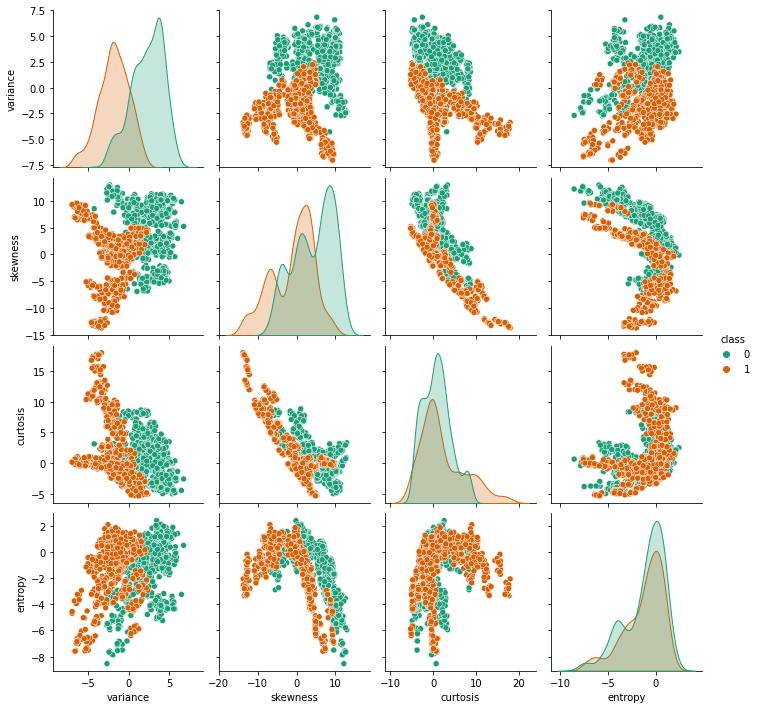

In [4]:
sns.pairplot(df,hue="class",palette='Dark2')

<AxesSubplot:xlabel='class', ylabel='count'>

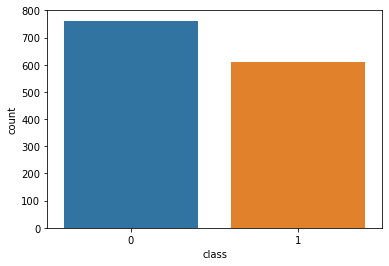

In [5]:
sns.countplot(x ='class', data = df)

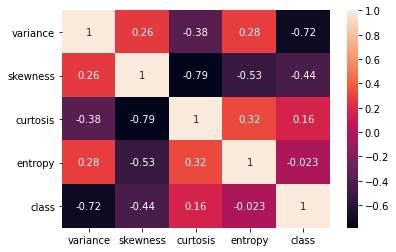

In [6]:
#Heatmap of all features:

sns.heatmap(df.corr(), annot = True)
plt.show()

## Pre-Processing the data

In [7]:
#Finding the count of null values wrt to attributes/features/columns.

undefined_values=df.isnull().sum()
print(undefined_values)

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64


In [8]:
df.isnull()

,variance,skewness,curtosis,entropy,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1367,False,False,False,False,False
1368,False,False,False,False,False
1369,False,False,False,False,False
1370,False,False,False,False,False


In [9]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [10]:
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

## Spliting the dataset

In [11]:
#Splitting of the train.csv file into 80:20 ratio for training and testing respectively.

from sklearn.model_selection import train_test_split
X = df[['variance', 'skewness', 'curtosis', 'entropy']]
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Implementation of Logistic Regression

In [12]:
#Implementation of Logistic Regression

logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0])

## Comparing Actual value and Predicted value

In [13]:
#Concatenating the Predicted values and actual values in one dataframe lr_op.

lr_op = pd.DataFrame({'Actual value': y_test, 'Predicted value using Logistic Regression': y_pred})
lr_op.head(20)

,Actual value,Predicted value using Logistic Regression
1024,1,1
444,0,0
1224,1,1
1071,1,1
661,0,0
1233,1,1
419,0,0
579,0,0
675,0,0
6,0,0


## Model Evaluation

In [14]:
#Compute the Mean Square error for the Logistic Regression trained model:

meanSqErr = metrics.mean_squared_error(y_test, y_pred)
print('Mean Square Error for Logistic Regression:', meanSqErr*100,'%')

Mean Square Error for Logistic Regression: 1.4545454545454546 %


In [15]:
#Compute the accuracy of Logistic Regression Model:

from sklearn.metrics import accuracy_score

print("Accuracy Score of Logistic Regression: ",accuracy_score(y_test,y_pred)*100,'%')

Accuracy Score of Logistic Regression:  98.54545454545455 %


## Conclusion: 
After implementing the logistic regression model on the above dataset. we compared the actual value vs predicted value and evaluated the accuracy of the model along with mean square error. After running the logistic regression model on the above dataset the accuracy of the model comes out to be 98.54% and the Mean Square Error of 1.45%. So, we can conclude that the logistic regression model gives a extraordinary accuracy. 